# Notebook 6: The South London Experiment



***By the end of this notebook, you should:***
- observe the power of natural experiments
- refresh your memory on contingency tables, statistical significance, and scientific visualization
- find out if contaminated water is a plausible explanation for why Londoners died of cholera

## The 2 Water Suppliers

South London was served by two water companies: Lambeth and Southwark & Vauxhall. In 1849, both drew their water from about the same location along the Thames River when London experienced one of its worst cholera outbreaks.

In 1852, the Lambeth Waterworks Company moved its water intake further up the River Thames, away from where the sewage pipes entered the river. The Southwark & Vauxhall water company, on the other hand, left its intake in the same location where sewage was still entering its drinking water supply.

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/south_london_water.jpeg?raw=true" alt="Drawing" width="600"> </td>
</tr></table>

<br>

Lambeth moving its water supply presented a unique opportunity for researchers of the time to study whether moving the water supply influenced Londoners' likelihood of dying from cholera. While the researchers did not themselves change the research environment by moving the water supply, they can study if and how this change affected their outcome variable. In data science, we call such an experiment a **natural experiment**.

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size="4"> **Journal 6a:** Examples of natural experiments</font>

**Consider recent events in your lifetime. Can you think of an event that scientists could use as a natural experiment?** *(feel free to be creative!)*

> Write your answer here!

<br>

## Testing the Waterborne Hypothesis

When we used contingency tables in the past, we compared a **treatment group** to a **control group**. In this case, the subdistricts and their people that received their water from Lambeth are considered the **treatment group**. Why do you think that is?

The independent (explanatory) variable is the water company and the dependent (outcome) variable is cholera deaths.  Since we are examining a change over time, we will split the dependent variable into deaths in 1849 (before Lambeth moved their water supply) and deaths in 1854 (after Lambeth moved their water supply).

The resulting contingency table will look like this.

<img src = "https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/grand_exp_contingency.jpeg?raw=true" width="700"/>

**Let's build this contingency table!**




In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
Subdistricts = pd.read_csv("https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/Datasets/subdistricts_dataset.csv?raw=true")


### Data Dictionary

- **district**: the London district
- **subdist**: the subdistrict within the larger district
- **supplier**: who supplies the water to the subdistrict
- **perc_sou**: percentage of subdistrict water from Southwark & Vauxhall
- **perc_lam**: percentage of subdistrict water from Lambeth
- **pop_1849**: subdistrict population in 1849
- **pop_1854**: subdistrict population in 1854
- **deaths1849**: deaths from cholera in 1849
- **deaths1854**: deaths from cholera in 1854

In [ ]:
Both_Outbreaks = Subdistricts[["district",
                                 "subdist",
                                 "supplier",
                                 "perc_sou",
                                 "perc_lam",
                                 "pop1849",
                                 "pop1854",
                                 "deaths1849",
                                 "deaths1854",
                                 ]]

Both_Outbreaks

,district,subdist,supplier,perc_sou,perc_lam,pop1849,pop1854,deaths1849,deaths1854
0,Camberwell,Dulwich,Lambeth,0.000000,0.024720,1632.0,1632.0,1,0.0
1,Lambeth,Norwood,Lambeth,0.000000,0.273631,3749.0,4345.0,2,10.0
2,Wandsworth,Streatham,Lambeth,0.000000,0.368857,8985.0,9081.0,154,15.0
3,Wandsworth,Putney,SouthwarkVauxhall,0.017756,0.000000,5155.0,5473.0,8,9.0
4,Wandsworth,Wandsworth,SouthwarkVauxhall,0.115570,0.000000,9173.0,10306.0,97,59.0
5,Lambeth,Brixton,SouthwarkVauxhall_Lambeth,0.137275,0.640768,13590.0,16285.0,81,48.0
6,St. George Southwark,London Road,SouthwarkVauxhall_Lambeth,0.160198,0.669582,17490.0,18368.0,257,93.0
7,Lambeth,Lambeth Church (1st),SouthwarkVauxhall_Lambeth,0.169753,0.830247,18409.0,18409.0,215,49.0
8,St. Saviour Southwark,Christchurch Southwark,SouthwarkVauxhall_Lambeth,0.180344,0.807445,15730.0,16470.0,256,113.0
9,Lambeth,Waterloo Road (1st),SouthwarkVauxhall_Lambeth,0.236592,0.763408,13807.0,14521.0,193,58.0


### Creating Our Groups

We first need to create two groups: subdistricts that received most of their water from the Lambeth water company and subdistricts that received most of their water from the Southwark & Vauxhall water company.

In [ ]:
# Task 1. split the data into two groups that are mostly Lambeth and mostly Southwark & Vauxhall
mostly_lam = Subdistricts[Subdistricts['perc_lam']>0.50]
mostly_sv = Subdistricts[Subdistricts['perc_sou']>0.50]

We can use these two groups (mostly Lambeth and mostly Southwark & Vauxhall) to create the four groups of the contingency table.

In [ ]:
# Task 2. calculate the total number of deaths in 1849 for each of the groups
lam_deaths_1849 = mostly_lam['deaths1849'].sum()
sv_deaths_1849 = mostly_sv['deaths1849'].sum()

print(f"Mostly Lambeth deaths in 1849: {lam_deaths_1849}")
print(f"Mostly Southwark and Vauxhall deaths in 1849: {sv_deaths_1849}")

Mostly Lambeth deaths in 1849: 2108
Mostly Southwark and Vauxhall deaths in 1849: 3708


In [ ]:
# Task 3. calculate the total number of deaths in 1854 for each of the groups
lam_deaths_1854 = mostly_lam['deaths1854'].sum()
sv_deaths_1854 = mostly_sv['deaths1854'].sum()

print(f"Mostly Lambeth deaths in 1854: {lam_deaths_1854}")
print(f"Mostly Southwark and Vauxhall deaths in 1854: {sv_deaths_1854}")

Mostly Lambeth deaths in 1854: 895.0
Mostly Southwark and Vauxhall deaths in 1854: 3726.0


Now let's put this data in a contingency table.

In [ ]:
# our old friend --> the function to create contingency tables.
def visualize_contingency_table(contingency_table, top_labels, left_labels):
    # print("\t\t  Close | Far ")
    print('{:<20s} {:<20s} {:<10s}'.format(top_labels[0], top_labels[1], top_labels[2]))

    i = 0
    for line in contingency_table:
        print('{:<20s} {:<20s} {:<10s}'.format(left_labels[i], str(line[0]), str(line[1])))
        i += 1
    print("\n")

top_labels = [" ", "Mostly Lam", "Mostly SV"]
left_labels = ["Deaths 1849", "Deaths 1854"]

# Task 2. Create a contingency table with the total deaths for each group in 1849 and 1854.
contingency_table = [
    [lam_deaths_1849, sv_deaths_1849],
    [lam_deaths_1854, sv_deaths_1854],

]

# Visualize the contingency table in the Jupyter console.
print("Our contingency table...")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Our contingency table...
                     Mostly Lam           Mostly SV 
Deaths 1849          2108                 3708      
Deaths 1854          895.0                3726.0    




<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size="4">**Journal 6b:** Contingency table </font>

**What does the contingency table suggest to you?**
> Write your answer here!

### Formalizing Your Results

**Now comes the hard part, convincing others to believe your argument. We can do this two ways:**
- Test if the difference in the two groups is statistically significant (Chi-squared and p-value)
- Create a visualization

**Chi-squared**: Test if the difference in the groups is statistically significant:

In [ ]:
from scipy.stats import chi2_contingency

# Now let us get our p-value!
# ... when doing data science in Python, it is common convention to use
#.    "_" characters to mark variables whose values we don't need.
chi_square, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Our p-value: {p_value:.5f}")

Our p-value: 0.00000


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size="4">**Journal 6c:** Statistical Significance </font>

**Based on the p-value of your $Chi^2$ test, can you claim within reasonable doubt (p < 0.05) that the result of your $Chi^2$ test is statistically significant?**
> Write your answer here!

<br>

**Visualization.** The contingency table and $Chi^2$ test are based on frequencies (counts) in each group. We know from before, that we want to normalize counts. So let’s divide the death counts in each group and year by the respective population counts to express the groups in `deaths per 1000`.



In [ ]:
# Task 1. Calculate the death rate per 1000 in 1849 for each group
lam_rate_1849 = lam_deaths_1849 / (mostly_lam['pop1849'].sum()) * 1000
sv_rate_1849 = sv_deaths_1849 / (mostly_sv['pop1849'].sum()) * 1000

print(f"Mostly Lambeth death rate per 1000 in 1849: {lam_rate_1849:.2f}")
print(f"Mostly Southwark and Vauhall death rate per 1000 in 1849: {sv_rate_1849:.2f}")

Mostly Lambeth death rate per 1000 in 1849: 13.93
Mostly Southwark and Vauhall death rate per 1000 in 1849: 14.99


In [ ]:
# Task 2. Calculate the death rate per 1000 in 1854 for each group
lam_rate_1854 = lam_deaths_1854 / (mostly_lam['pop1854'].sum()) * 1000
sv_rate_1854 = sv_deaths_1854 / (mostly_sv['pop1854'].sum()) * 1000

print(f"Mostly Lambeth death rate per 1000 in 1854: {lam_rate_1854:.2f}")
print(f"Mostly Southwark and Vauhall death rate per 1000 in 1854: {sv_rate_1854:.2f}")

Mostly Lambeth death rate per 1000 in 1854: 5.51
Mostly Southwark and Vauhall death rate per 1000 in 1854: 13.70


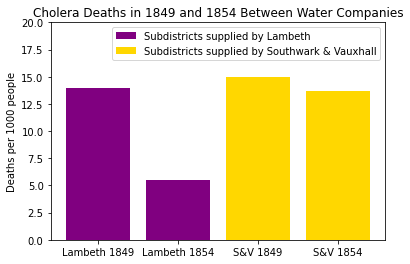

In [ ]:
# Task 3: Visualize the differences in the two groups with a bar graph

# 1. Let's first view the Lambeth data.
plt.bar(x=['Lambeth 1849', 'Lambeth 1854'],
        height=[lam_rate_1849, lam_rate_1854], color='purple', label='Subdistricts supplied by Lambeth')

# 2. Now let's view the Southwark & Vauxhall data.
plt.bar(x=['S&V 1849', 'S&V 1854'],
        height=[sv_rate_1849, sv_rate_1854], color='gold', label='Subdistricts supplied by Southwark & Vauxhall')

plt.ylim((0,20))
plt.ylabel("Deaths per 1000 people")
plt.title("Cholera Deaths in 1849 and 1854 Between Water Companies")
plt.legend()
plt.show()

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size="4">**Journal 6d:** An Effective Visualization? </font>

**Does this visualization clearly communicate the results of your test? What, if anything, would you change about the visualization to make it easier for the public to understand your findings?**
> Write your answer here!

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size="4">**Journal 6e:** Reflection </font>

At the end of each notebook in Data4All, we will take time to reflect on what we learned! You can write as much or as little as you like, but please answer the following questions...

**What do you understand better after this notebook than before?**
> Write your answer here!

**Please fill out the Notebook survey here!**
> https://forms.gle/54KHEbPGsRxQU3Bh9

<br>

--------------------------------

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">    **&ensp;&ensp;&ensp;Last step: save your work!** </font>